# Zwift Training (ZT)

Welcome to this little Zwift training companion tool. The best way to use this tool is to follow along the demonstration in this notebook. 

Let's get started by copying this notebook to a new file and follow a long. Note: you need to run the notebook from this same directory.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
import pandas as pd

Import `ZwiftTraining` from ztraining module.

In [3]:
from ztraining import ZwiftTraining

## Creating new Zwift Training Profile

Create JSON file with the following content:

```
{
	"zwift-user": "joe@example.com",
	"zwift-password": "s3cret",
	"dir": "my-ztraining-data"
}
```

The description of the fields are as follows:


#### `zwift-user`

- Email to login to Zwift.
- If this field is empty, we won't interact with online Zwift account (you can still use it to manage activities by importing TCX/GPX/FIT files)

#### `zwift-password`

- Password to login to Zwift

#### `dir` 

- Specify alternate directory to store profile and training data. Default value: `my-ztraining-data` (in current directory) if not specified.

**Hint:** I use Google Drive to store my profile and training data so I can access it from different computers.

Store it to a file, and specify it when creating `ZwiftTraining` object:

In [4]:
zt = ZwiftTraining('benny.json')

Zwift user: benny.prijono@gmail.com
Profile data directory: /home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/zwift_training_2


Now we're ready to interact with online Zwift account.

## Updating Zwift Profile and Statistics

You need to call this periodically, especially after any changes in your profile statistics, such as change in XPs and drops (usually after finishing an activity). Calling this periodically updates the profile history that you can nicely display later.

Update your profile and statistics by calling `zwift_update()`.

In [4]:
zt.zwift_update()

Zwift local profile updated


1

This is your profile information (it's a Pandas Series, hence you can access the item like a dictionary):

In [5]:
zt.profile_info

dtime                2020-07-01 10:16:29
cycling_level                      13.76
cycling_distance                 662.595
cycling_elevation                   6276
cycling_calories                     NaN
cycling_xp                         31807
cycling_drops                      31440
ftp                                  160
weight                                83
running_level                       2.73
running_distance                   8.915
running_minutes                       95
running_xp                          1732
running_calories                     336
Name: 35, dtype: object

You can calculate the XPs required to level up:

In [6]:
cycling_level = int(zt.profile_info["cycling_level"])
xp_required = zt.get_cycling_level_xp(cycling_level+1) - zt.profile_info['cycling_xp']

print(f'Your cycling level is {cycling_level}')
print(f'You need {xp_required} XPs to level up')

Your cycling level is 13
You need 1193 XPs to level up


If you've used ZT for a while and updated your profile periodically, your profile history can be retrieved as follows. This will return a DataFrame.

In [7]:
zt.profile_history.tail(5)

,dtime,cycling_level,cycling_distance,cycling_elevation,cycling_calories,cycling_xp,cycling_drops,ftp,weight,running_level,running_distance,running_minutes,running_xp,running_calories
31,2020-06-26 12:00:00,12.00,587.000,5944,9271.0,28551,387748,160,83.2,NaN,NaN,NaN,NaN,NaN
32,2020-06-27 12:00:00,13.00,642.000,6217,9992.0,30947,426285,160,83.0,NaN,NaN,NaN,NaN,NaN
33,2020-06-27 12:00:00,13.00,642.000,6217,9992.0,30947,17985,160,83.0,NaN,NaN,NaN,NaN,NaN
34,2020-06-29 21:14:23,13.59,641.983,6217,NaN,30947,17985,160,83.0,2.73,8.915,95.0,1732.0,336.0
35,2020-07-01 10:16:29,13.76,662.595,6276,NaN,31807,31440,160,83.0,2.73,8.915,95.0,1732.0,336.0


As you can see, each row contains a profile statistic, and the `zt.profile_info` is simply the latest data in the profile history.

Once you've accumulate some history, you can plot the progress of each field per certain interval. For example, to display your weekly cycling distance:

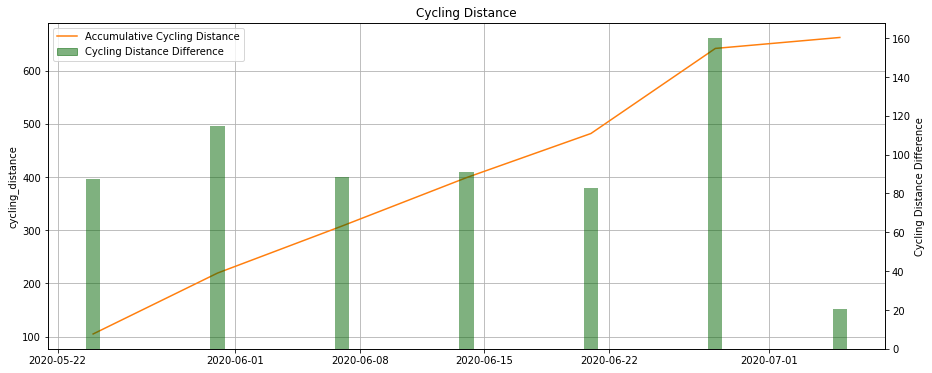

In [8]:
zt.plot_profile_history('cycling_distance', interval='W-SUN')

Another example, to display your daily XPs earnings in month of June 2020:

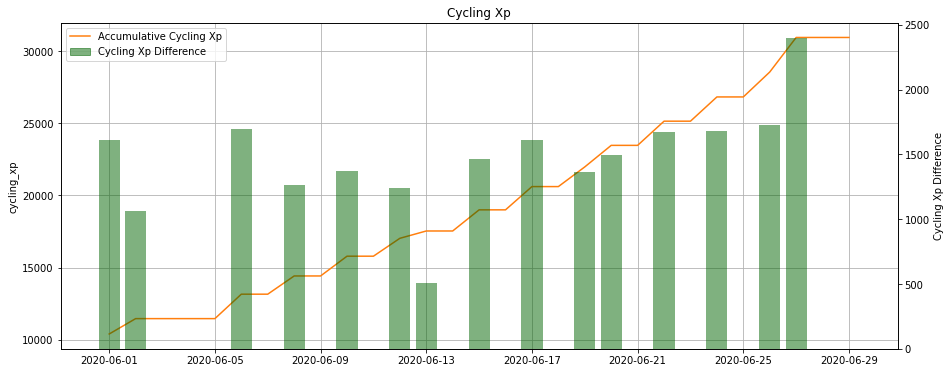

In [9]:
zt.plot_profile_history('cycling_xp', interval='D', 
                        from_dtime='2020-06-01', to_dtime='2020-06-30')

For the **drops**, the plot will be rather interesting since the value can go up or down (it goes down when you're making a purchase).

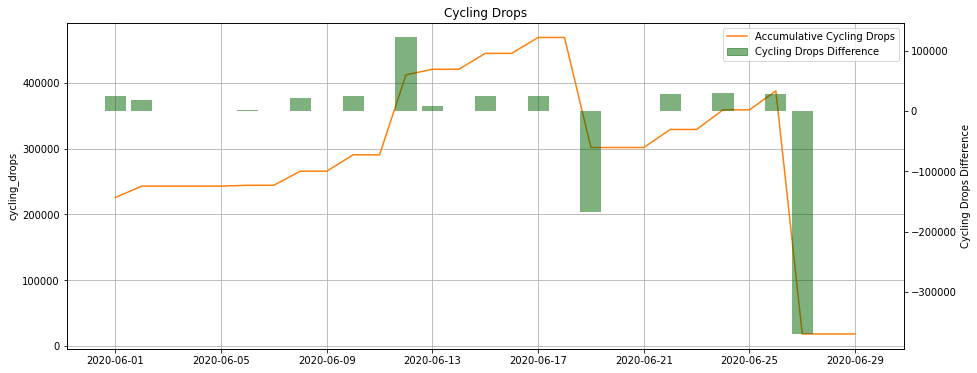

In [10]:
zt.plot_profile_history('cycling_drops', interval='D', 
                        from_dtime='2020-06-01', to_dtime='2020-06-30')

All of these plots only use your profile history information. You can do a lot more once you import your activities.

## Importing Zwift Activities

Activities need to be parsed and saved to local CSV files before they can be analyzed. ZT can import activities from online Zwift account or from local TCX/GPX/FIT files.  In this section we'll demonstrate importing the activities from online Zwift account.

First let's list the activities that we have, to make sure that ZT can see your activities correctly.

In [11]:
adf = zt.zwift_list_activities(start=0, max=10)
adf

,dtime,sport,title,id,duration,distance,elevation,power_avg,calories
0,2020-07-01 08:49:17,cycling,Watopia,584346566409622112,00:46:41.699000,20.6,59.7,112.4,292.6
1,2020-06-27 06:39:35,cycling,Zwift - Volcano laps,581382235002805376,02:11:22.774000,54.9,273.1,116.6,810.3
2,2020-06-26 05:49:18,cycling,Zwift - Watopia,580632099939204688,01:37:10.962000,37.9,302.9,114.3,618.4
3,2020-06-24 07:10:37,cycling,Zwift - Yorkshire,579223480630814016,01:41:34.111000,32.0,546.3,108.2,621.9
4,2020-06-22 06:32:29,cycling,Zwift - Watopia,577754733285054560,01:35:48.099000,35.6,340.3,110.9,598.8
5,2020-06-20 07:46:19,cycling,Zwift - 06/20/2020,576342344975089968,02:19:34.885000,52.9,264.1,97.6,730.0
6,2020-06-19 08:44:04,cycling,Zwift,575646638778917760,01:25:36.516000,26.3,408.5,106.1,498.9
7,2020-06-17 05:53:57,cycling,Watopia,574111459786657280,01:36:27.341000,30.4,275.5,112.3,606.4
8,2020-06-15 06:39:48,cycling,Zwift - M8070. 1:20H 70% MAF,572684986805748512,01:23:50.674000,26.1,322.4,109.1,510.9
9,2020-06-13 06:16:19,running,Zwift Run - 55 Minutes,571223613118713360,00:52:25.866000,3.6,0.0,0.0,132.1


We can also parse online Zwift activity without actually saving it locally:

In [12]:
activity_id = adf['id'].iloc[0]

df, meta = zt.parse_zwift_activity(activity_id)

print('')
for key, val in meta.items():
    print(f'{key:20s}: {val}')

print('\nActivity data:')
display(df)

Getting activity Watopia (2020-07-01 08:49:17)

dtime               : 2020-07-01 08:49:17
sport               : cycling
title               : Watopia
src_file            : 584346566409622112.zwift
distance            : 20.612
duration            : 0 days 00:45:20
mov_duration        : 0 days 00:45:20
elevation           : 58.4
speed_avg           : 27.3
speed_max           : 53.2
hr_avg              : 125.14
hr_max              : 145.0
power_avg           : 112.53
power_max           : 177.0
cadence_avg         : 68.84
cadence_max         : 118.0
temp_avg            : nan
temp_max            : nan

Activity data:


,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2020-07-01 08:49:59,0.0,0,-11.636603,166.972348,12.8,2.12,0.002,79.0,54.0,7.63,57.0,NaN
1,2020-07-01 08:50:00,1.0,1,-11.636591,166.972355,12.8,1.55,0.004,80.5,54.0,6.61,60.5,NaN
2,2020-07-01 08:50:01,2.0,2,-11.636576,166.972365,12.8,1.88,0.006,83.5,56.0,6.66,63.0,NaN
3,2020-07-01 08:50:02,3.0,3,-11.636560,166.972375,12.8,2.16,0.008,85.0,57.0,6.71,61.0,NaN
4,2020-07-01 08:50:03,4.0,4,-11.636542,166.972387,12.8,2.42,0.010,86.5,57.5,7.75,61.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,2020-07-01 09:35:15,2716.0,2716,-11.642237,166.991876,13.2,4.30,20.603,120.0,60.0,18.31,0.0,NaN
2717,2020-07-01 09:35:16,2717.0,2717,-11.642246,166.991907,13.2,3.50,20.606,119.5,30.0,15.47,0.0,NaN
2718,2020-07-01 09:35:17,2718.0,2718,-11.642253,166.991931,13.2,2.78,20.609,118.5,0.0,12.70,0.0,NaN
2719,2020-07-01 09:35:18,2719.0,2719,-11.642258,166.991949,13.2,2.03,20.611,118.0,0.0,9.97,0.0,NaN


Once we're satisfied that things are displayed okay, we import Zwift activities by calling `zwift_update()` with `max` parameter set to nonzero.

Here's what `zwift_update()` does.

In [13]:
help(zt.zwift_update)

Help on method zwift_update in module ztraining.ztraining:

zwift_update(start=0, max=0, batch=10, from_dtime=None, to_dtime=None, profile=True, overwrite=False, quiet=False) method of ztraining.ztraining.ZwiftTraining instance
    Update local profile and statistics and optionally scan and update new activities 
    from the online Zwift account.
    
    Parameters:
    - start:      Start number of activity index to import (zero is the latest) 
    - max:        Maximum number of activities to scan.
    - batch:      How many activities to scan from Zwift website for each loop
    - from_dtime: Only import activities from this datetime. We still have to scan
                  the activities one by one starting from the latest activity,
                  so the start and max parameters are still used.
    - to_dtime:   Only import activities older than this datetime.
    - profile:    True to check for profile updates.
    - overwrite:  True to force overwriting already saved activit

Let's import some activities.

In [14]:
zt.zwift_update(max=50)

Zwift local profile is up to date (last update: 2020-07-01 10:16:29)
Querying start: 0, limit: 10
Fetched 10 activities metadata
Found activity 0: Watopia (2020-07-01 08:49:17) (id: 584346566409622112)
Getting activity Watopia (2020-07-01 08:49:17)
Found activity 1: Zwift - Volcano laps (2020-06-27 06:39:35) (id: 581382235002805376)
Getting activity Zwift - Volcano laps (2020-06-27 06:39:35)
Found activity 2: Zwift - Watopia (2020-06-26 05:49:18) (id: 580632099939204688)
Getting activity Zwift - Watopia (2020-06-26 05:49:18)
Found activity 3: Zwift - Yorkshire (2020-06-24 07:10:37) (id: 579223480630814016)
Getting activity Zwift - Yorkshire (2020-06-24 07:10:37)
Found activity 4: Zwift - Watopia (2020-06-22 06:32:29) (id: 577754733285054560)
Getting activity Zwift - Watopia (2020-06-22 06:32:29)
Found activity 5: Zwift - 06/20/2020 (2020-06-20 07:46:19) (id: 576342344975089968)
Getting activity Zwift - 06/20/2020 (2020-06-20 07:46:19)
Found activity 6: Zwift (2020-06-19 08:44:04) (id: 

Import error: error parsing activity index: 10, id: 571221983410296688, datetime: 2020-06-13 06:13:04, title: "Zwift - 06/13/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 11: Zwift - M3065. MAF Rest Day (2020-06-13 05:29:24) (id: 571200003319567024)
Getting activity Zwift - M3065. MAF Rest Day (2020-06-13 05:29:24)
Found activity 12: Zwift - M7070. 1:10H 70%  MAF (2020-06-12 06:50:35) (id: 570516090740903040)
Getting activity Zwift - M7070. 1:10H 70%  MAF (2020-06-12 06:50:35)
Found activity 13: Zwift - M7570. 1:15H 70% MAF (2020-06-10 05:54:06) (id: 569038103910652800)
Getting activity Zwift - M7570. 1:15H 70% MAF (2020-06-10 05:54:06)
Found activity 14: Zwift - M7070. 1:10H 70%  MAF (2020-06-08 07:12:13) (id: 567627875689211152)
Getting activity Zwift - M7070. 1:10H 70%  MAF (2020-06-08 07:12:13)
Found activity 15: Zwift - 06/06/2020 (2020-06-06 07:19:31) (id: 566181999841215872)
Getting activity Zwift - 06/06/2020 (2020-06-06 07:19:31)


Import error: error parsing activity index: 15, id: 566181999841215872, datetime: 2020-06-06 07:19:31, title: "Zwift - 06/06/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 16: Zwift - M6070. 1H 70%  MAF (2020-06-06 05:54:54) (id: 566139406180780368)
Getting activity Zwift - M6070. 1H 70%  MAF (2020-06-06 05:54:54)
Found activity 17: Zwift Run - Up and Down 1 (Easy) (2020-06-04 06:52:06) (id: 564718646962272976)
Getting activity Zwift Run - Up and Down 1 (Easy) (2020-06-04 06:52:06)
Found activity 18: Zwift - M6065. 1H 65%  MAF (2020-06-02 06:13:05) (id: 563249452894528128)
Getting activity Zwift - M6065. 1H 65%  MAF (2020-06-02 06:13:05)
Found activity 19: Zwift - 06/01/2020 (2020-06-01 12:43:21) (id: 562721110419708560)
Getting activity Zwift - 06/01/2020 (2020-06-01 12:43:21)


Import error: error parsing activity index: 19, id: 562721110419708560, datetime: 2020-06-01 12:43:21, title: "Zwift - 06/01/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 20: Zwift - B2. 70% (2020-06-01 10:03:39) (id: 562640731556056336)
Getting activity Zwift - B2. 70% (2020-06-01 10:03:39)
Found activity 21: Zwift - B1. 70%  with Warmup (2020-06-01 09:09:31) (id: 562613479621400272)
Getting activity Zwift - B1. 70%  with Warmup (2020-06-01 09:09:31)
Found activity 22: Zwift - 1H 40% Recovery Interval (2020-05-31 08:23:36) (id: 561865596899801088)
Getting activity Zwift - 1H 40% Recovery Interval (2020-05-31 08:23:36)
Found activity 23: Zwift - Richmond (2020-05-30 07:54:33) (id: 561126198099076336)
Getting activity Zwift - Richmond (2020-05-30 07:54:33)
Found activity 24: 1H 75%  Low Tempo Interval (2020-05-30 07:01:24) (id: 561099500420478896)
Getting activity 1H 75%  Low Tempo Interval (2020-05-30 07:01:24)
Found activity 25: Zwift - 1H 40-75% Interval (2020-05-30 06:24:28) (id: 561080855340801792)
Getting activity Zwift - 1H 40-75% Interval (2020-05-30 06:24:28)
Found activity 26: Zwift - 1H 40% Recovery Interval (2020-05-30 06:05:48

Import error: error parsing activity index: 33, id: 557068593913759280, datetime: 2020-05-24 17:32:49, title: "Zwift - 05/24/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 34: Long Tempo (2020-05-24 16:36:52) (id: 557040434648562528)
Getting activity Long Tempo (2020-05-24 16:36:52)
Found activity 35: 10-12wk FTP Builder Week 1 (Skip if you are in shape) Day 1 (2020-05-22 16:28:37) (id: 555586728736438288)
Getting activity 10-12wk FTP Builder Week 1 (Skip if you are in shape) Day 1 (2020-05-22 16:28:37)
Found activity 36: Fondo - The Long Ride (2020-05-21 16:32:36) (id: 554863960222972400)
Getting activity Fondo - The Long Ride (2020-05-21 16:32:36)
Found activity 37: Fondo - Introductory Intervals (2020-05-19 16:27:04) (id: 553411626219106000)
Getting activity Fondo - Introductory Intervals (2020-05-19 16:27:04)
Found activity 38: Fondo - Welcome Workout (2020-05-18 16:23:58) (id: 552685460428454048)
Getting activity Fondo - Welcome Workout (2020-05-18 16:23:58)
Found activity 39: Zwift - 05/17/2020 (2020-05-17 09:34:01) (id: 551754177019150928)
Getting activity Zwift - 05/17/2020 (2020-05-17 09:34:01)


Import error: error parsing activity index: 39, id: 551754177019150928, datetime: 2020-05-17 09:34:01, title: "Zwift - 05/17/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Querying start: 40, limit: 50
Fetched 0 activities metadata


35

### About Import Errors

If you're lucky, your import will go trough without problems. If you have any errors such as above *("Import error: error parsing activity blah blah")*, then you can do the following:

- go to https://zwift.com/activity/--activity_id-- (replace with the activity id in the error message)
- export the activity to a .FIT file, and then import the activity using `zt.import_activity_file(path)`
- if you can't open the activity in the website, then you can probably just ignore the error.


## Importing TCX, GPX, and FIT Files

If you want to be able to calculate power curves for activities not from Zwift, you can import them to ZT by specifying a specific file to import or a directory to scan for TCX/GPX/FIT files.

By default, the import functions will not import the file if data from the same filename (excluding the path) already exists in the activity list.

In [16]:
help(zt.import_files)

Help on method import_files in module ztraining.ztraining:

import_files(dir, max=None, from_dtime=None, to_dtime=None, overwrite=False, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



In [15]:
help(zt.import_activity_file)

Help on method import_activity_file in module ztraining.ztraining:

import_activity_file(path, sport=None, overwrite=False, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



Use `parse_file()` to just parse the activity file without importing it:

In [19]:
df, meta = ZwiftTraining.parse_file('tests/tcx_gpx_fit_files/102574211.tcx')
print('')
for k, v in meta.items():
    print(f'{k:20s}: {v}')
print('\nData:')
display(df)


dtime               : 2013-11-09 05:04:11
sport               : cycling
title               : 
src_file            : 102574211.tcx
distance            : 215.072
duration            : 0 days 10:39:43
mov_duration        : 0 days 07:58:23
elevation           : 2243.0
speed_avg           : 27.0
speed_max           : 56.5
hr_avg              : 144.49
hr_max              : 193.0
power_avg           : 121.41
power_max           : 561.5
cadence_avg         : 80.3
cadence_max         : 122.0
temp_avg            : nan
temp_max            : nan

Data:


,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2013-11-09 05:04:11,0.0,0,-8.763816,115.170127,21.4,4.020,0.004,117.0,56.0,14.47,129.0,NaN
1,2013-11-09 05:04:12,1.0,1,-8.763776,115.170131,21.4,4.150,0.008,117.5,57.0,14.71,123.5,NaN
2,2013-11-09 05:04:13,2.0,2,-8.763734,115.170134,21.4,4.410,0.013,119.0,60.0,15.10,125.5,NaN
3,2013-11-09 05:04:14,3.0,3,-8.763689,115.170131,21.4,4.620,0.017,121.0,63.5,15.82,120.0,NaN
4,2013-11-09 05:04:15,4.0,4,-8.763642,115.170130,21.4,4.810,0.022,122.5,66.0,16.61,110.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28726,2013-11-09 15:43:50,38379.0,28699,-8.154801,115.037233,67.0,2.906,215.061,107.0,8.0,9.47,50.5,NaN
28727,2013-11-09 15:43:51,38380.0,28700,-8.154811,115.037248,67.0,2.953,215.064,107.0,24.0,10.16,46.5,NaN
28728,2013-11-09 15:43:52,38381.0,28701,-8.154815,115.037259,67.0,2.797,215.067,107.0,32.0,10.39,29.5,NaN
28729,2013-11-09 15:43:53,38382.0,28702,-8.154814,115.037258,66.8,2.828,215.070,107.0,24.0,10.29,0.0,NaN


## Working with Activities

### Activities

Use `get_activities()` to get the list of activities as DataFrame:

In [20]:
help(zt.get_activities)

Help on method get_activities in module ztraining.ztraining:

get_activities(from_dtime=None, to_dtime=None, sport=None) method of ztraining.ztraining.ZwiftTraining instance



In [56]:
zt.get_activities().tail(5)

,dtime,sport,title,src_file,distance,duration,mov_duration,elevation,speed_avg,speed_max,hr_avg,hr_max,power_avg,power_max,cadence_avg,cadence_max,temp_avg,temp_max,calories
475,2020-06-22 06:32:29,cycling,Zwift - Watopia,577754733285054560.zwift,35.570,01:34:17,01:33:18,324.3,22.9,67.6,126.32,138.0,111.43,184.0,65.18,123.0,NaN,NaN,598.8
476,2020-06-24 07:10:37,cycling,Zwift - Yorkshire,579223480630814016.zwift,32.008,01:40:11,01:37:46,533.1,19.6,84.4,123.81,138.0,108.93,179.0,63.51,118.0,NaN,NaN,621.9
477,2020-06-26 05:49:18,cycling,Zwift - Watopia,580632099939204688.zwift,37.947,01:34:29,01:34:01,289.4,24.2,67.9,124.40,138.0,114.52,144.0,65.70,149.0,NaN,NaN,618.4
478,2020-06-27 06:39:35,cycling,Zwift - Volcano laps,581382235002805376.zwift,54.945,02:09:49,02:00:55,250.8,27.3,46.4,127.33,145.5,116.83,151.5,67.24,117.0,NaN,NaN,810.3
479,2020-07-01 08:49:17,cycling,Watopia,584346566409622112.zwift,20.612,00:45:20,00:45:20,58.4,27.3,53.2,125.14,145.0,112.53,177.0,68.84,118.0,NaN,NaN,292.6


And this is of course to display the last activity:

In [68]:
last_activity = zt.get_activities().iloc[-1]
last_activity

dtime                2020-07-01 08:49:17
sport                            cycling
title                            Watopia
src_file        584346566409622112.zwift
distance                          20.612
duration                 0 days 00:45:20
mov_duration             0 days 00:45:20
elevation                           58.4
speed_avg                           27.3
speed_max                           53.2
hr_avg                            125.14
hr_max                               145
power_avg                         112.53
power_max                            177
cadence_avg                        68.84
cadence_max                          118
temp_avg                             NaN
temp_max                             NaN
Name: 483, dtype: object

### Plotting Activities

Plot the field in the activities, such as `distance`, `elevation`, `calories`, `duration`, and `mov_duration`.

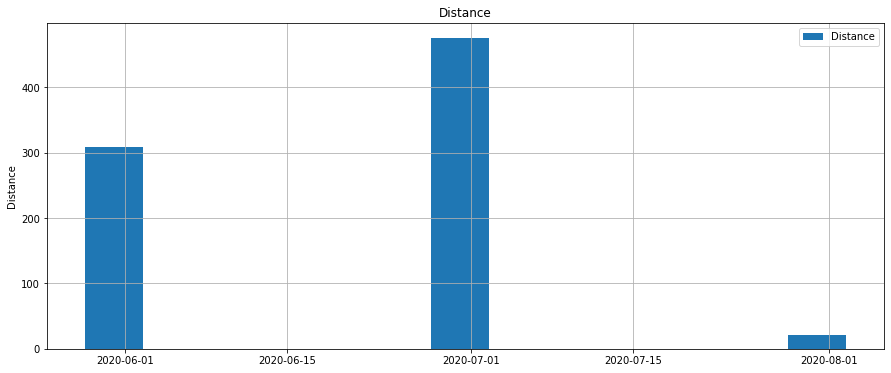

In [69]:
zt.plot_activities('distance', interval='M', sport='cycling',
                   from_dtime='2020-01-01', to_dtime='2020-12-31')

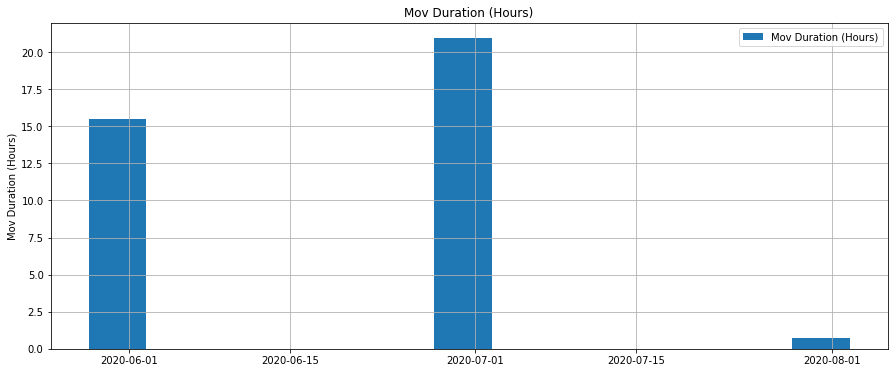

In [70]:
zt.plot_activities('mov_duration', interval='M', sport='cycling',
                   from_dtime='2020-01-01', to_dtime='2020-12-31')

### Activity Data

You can get the activity data as DataFrame by specifying either/both the dtime or `src_file`. The `src_file` is the original file that the activity was imported from. For Zwift activities, it has `.zwift` extension.

In [69]:
zt.get_activity_data(dtime=last_activity['dtime'])

,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2020-07-01 08:49:59,0.0,0,-11.636603,166.972348,12.8,2.12,0.002,79.0,54.0,7.63,57.0,NaN
1,2020-07-01 08:50:00,1.0,1,-11.636591,166.972355,12.8,1.55,0.004,80.5,54.0,6.61,60.5,NaN
2,2020-07-01 08:50:01,2.0,2,-11.636576,166.972365,12.8,1.88,0.006,83.5,56.0,6.66,63.0,NaN
3,2020-07-01 08:50:02,3.0,3,-11.636560,166.972375,12.8,2.16,0.008,85.0,57.0,6.71,61.0,NaN
4,2020-07-01 08:50:03,4.0,4,-11.636542,166.972387,12.8,2.42,0.010,86.5,57.5,7.75,61.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,2020-07-01 09:35:15,2716.0,2716,-11.642237,166.991876,13.2,4.30,20.603,120.0,60.0,18.31,0.0,NaN
2717,2020-07-01 09:35:16,2717.0,2717,-11.642246,166.991907,13.2,3.50,20.606,119.5,30.0,15.47,0.0,NaN
2718,2020-07-01 09:35:17,2718.0,2718,-11.642253,166.991931,13.2,2.78,20.609,118.5,0.0,12.70,0.0,NaN
2719,2020-07-01 09:35:18,2719.0,2719,-11.642258,166.991949,13.2,2.03,20.611,118.0,0.0,9.97,0.0,NaN


### Plotting a Single Activity

In [57]:
help(zt.plot_activity)

Help on method plot_activity in module ztraining.ztraining:

plot_activity(dtime=None, src_file=None, x='distance') method of ztraining.ztraining.ZwiftTraining instance



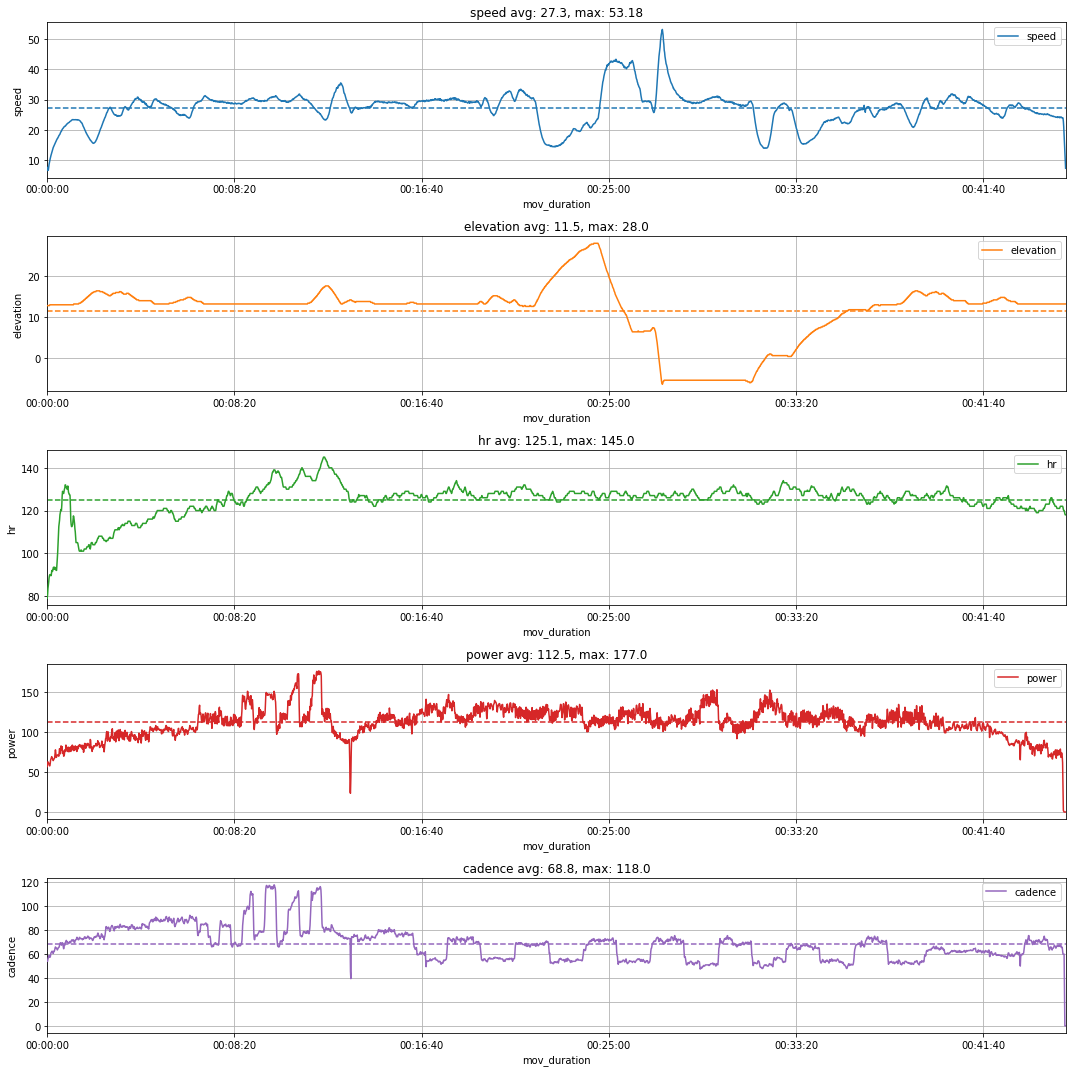

In [70]:
zt.plot_activity(dtime=last_activity["dtime"], x='mov_duration')

### Deleting an Activity

You may need to delete some activities, most likely because of duplication (for example, you import the activity from both Zwift account and from files). You can do it with:

In [24]:
help(zt.delete_activity)

Help on method delete_activity in module ztraining.ztraining:

delete_activity(dtime=None, src_file=None, dry_run=False) method of ztraining.ztraining.ZwiftTraining instance



## Power Curve

One of the useful service provided by ZT is to display the power curve. You can specify arbitrary periods to display the power curves.

In [42]:
help(zt.plot_power_curves)

Help on method plot_power_curves in module ztraining.ztraining:

plot_power_curves(periods, min_interval=None, max_interval=None, max_hr=None, title=None) method of ztraining.ztraining.ZwiftTraining instance



For example, let's plot the power curve of each month for the last five months.

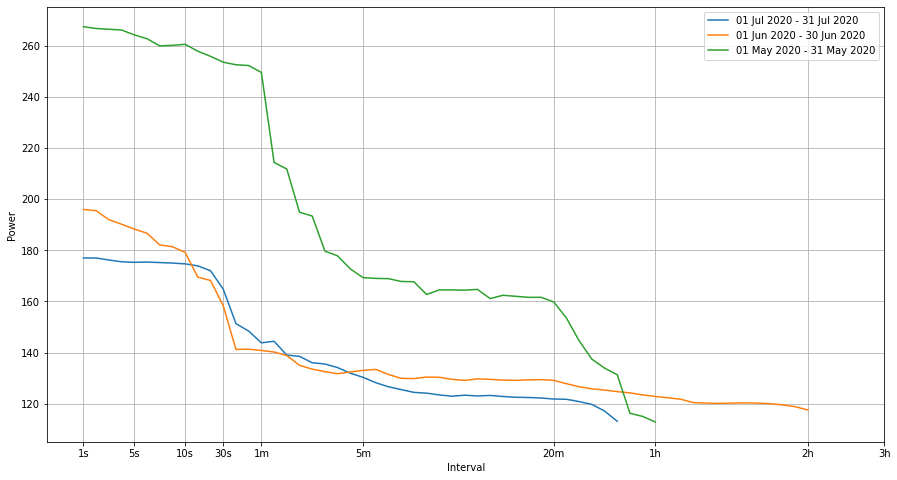

In [71]:
import datetime

monthly_periods = []
start_date = datetime.datetime.now().date()

while len(monthly_periods) < 5:
    start_date = start_date.replace(day=1)
    end_date = (start_date + datetime.timedelta(days=32)).replace(day=1) - \
               datetime.timedelta(days=1)
    monthly_periods.append( (start_date, end_date) )
    start_date -= datetime.timedelta(days=1)

#monthly_periods = reversed(monthly_periods)

zt.plot_power_curves(monthly_periods, max_interval=3*3600)

Of course you can throw in arbitrary period into the periods array, for example, the power curve from 2013-2014 period:

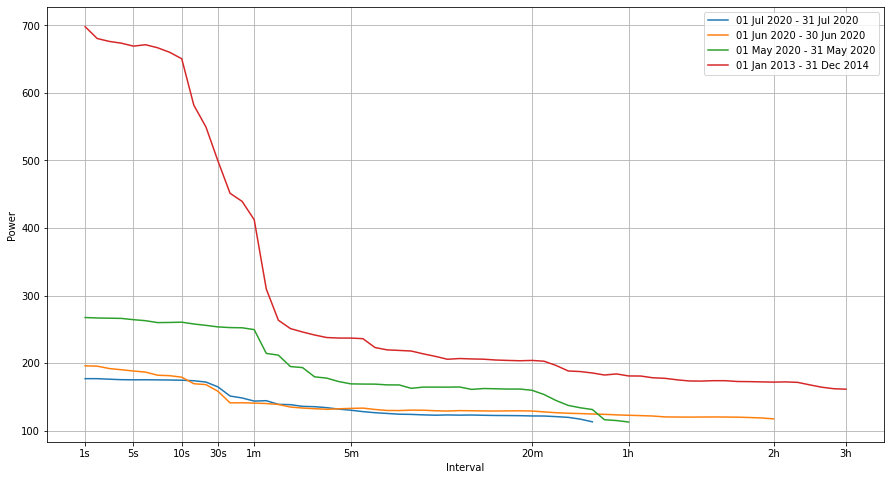

In [79]:
zt.plot_power_curves(monthly_periods + [('2013-01-01', '2014-12-31')], 
                     max_interval=3*3600)

The `max_hr` is useful when say you're following Maffetone method of training with specific maximum heart rate limit. In this case, you can track the power curve progression only when the heart rate is below that limit.

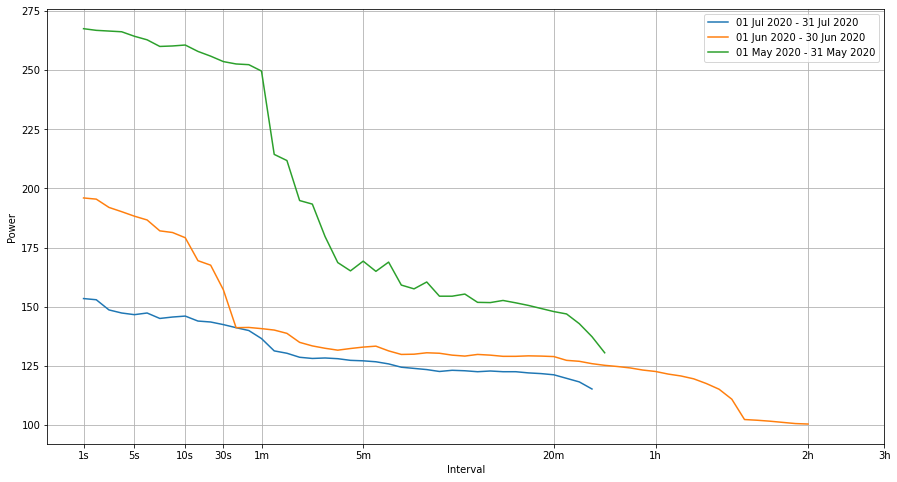

In [76]:
zt.plot_power_curves(monthly_periods, max_interval=3*3600, max_hr=130)

## Best Route Suggestion

Another thing is to get the best route to take that maximises the XP earnings, given the specified average power (watt) and duration to spend.

In [44]:
help(zt.best_cycling_route)

Help on method best_cycling_route in module ztraining.ztraining:

best_cycling_route(avg_watt, max_duration, min_duration=None, kind=None, done=None, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



In [5]:
zt.best_cycling_route('0:45:00', 110).head(10)

Training with 10 datapoints from 2020-06-17 05:53:57
Mean error: 4.9 minutes
Mean error: 4.4%


done  total distance  distance  lead-in  \
world     route                                                            
New York  Astoria Line 8            0            11.9      11.5      0.4   
Yorkshire Tour of Tewit Well        0            10.4      10.4      0.0   
Watopia   Volcano Flat              0            12.8      12.3      0.5   
New York  Park Perimeter Loop       0            10.2       9.8      0.4   
Richmond  Cobbled Climbs            0             9.5       9.2      0.3   
Watopia   Flat Route                0            10.8      10.3      0.5   
          Hilly Route               0             9.6       9.1      0.5   
New York  Grand Central Circuit     0             8.4       6.8      1.6   
Watopia   Jungle Circuit            1            13.6       7.9      5.7   
New York  The 6 Train               0             6.6       6.4      0.2   

                                 elevation  badge best activity  best pred xp  \
world     route                                                                 
New York  Astoria Line 8               141    230      interval           697   
Yorkshire Tour of Tewit Well           200    210      interval           677   
Watopia   Volcano Flat                  46    240      interval           673   
New York  Park Perimeter Loop          126    190      interval           611   
Richmond  Cobbled Climbs               126    180      interval           590   
Watopia   Flat Route                    54    200      interval           587   
          Hilly Route                  100    180      interval           579   
New York  Grand Central Circuit        137    140      interval           527   
Watopia   Jungle Circuit                79      0      interval           467   
New York  The 6 Train                   61    130      interval           437   

                                 power_avg  pred avg speed  pred minutes  \
world     route                                                            
New York  Astoria Line 8               110            17.2          41.4   
Yorkshire Tour of Tewit Well           110            15.0          41.7   
Watopia   Volcano Flat                 110            20.2          38.1   
New York  Park Perimeter Loop          110            16.4          37.4   
Richmond  Cobbled Climbs               110            15.7          36.2   
Watopia   Flat Route                   110            18.6          34.8   
          Hilly Route                  110            16.5          35.0   
New York  Grand Central Circuit        110            14.5          34.7   
Watopia   Jungle Circuit               110            19.8          41.3   
New York  The 6 Train                  110            14.5          27.4   

                                 best pred xp/minutes  
world     route                                        
New York  Astoria Line 8                         16.8  
Yorkshire Tour of Tewit Well                     16.2  
Watopia   Volcano Flat                           17.7  
New York  Park Perimeter Loop                    16.3  
Richmond  Cobbled Climbs                         16.3  
Watopia   Flat Route                             16.9  
          Hilly Route                            16.5  
New York  Grand Central Circuit                  15.2  
Watopia   Jungle Circuit                         11.3  
New York  The 6 Train                            15.9

In [7]:
zt.best_cycling_route('1:00:00', tss=70, ftp=200).head(10)

Avg watt: 167
Training with 10 datapoints from 2020-06-17 05:53:57
Mean error: 4.9 minutes
Mean error: 4.4%


,,done,total distance,distance,lead-in,elevation,badge,best activity,best pred xp,power_avg,pred avg speed,pred minutes,best pred xp/minutes
world,route,,,,,,,,,,,,
London,Greatest London Flat,0,31.1,23.6,7.5,163,500,ride,1120,167,40.4,46.2,24.2
Innsbruck,2018 UCI Worlds Course Short Lap,0,23.8,23.6,0.2,487,470,interval,1028,167,28.8,49.5,20.8
New York,Rising Empire,0,21.1,20.7,0.4,362,410,interval,843,167,33.2,38.1,22.1
Watopia,Sand and Sequoias,0,22.6,20.2,2.4,147,400,ride,840,167,45.7,29.7,28.3
London,London 8,0,20.8,20.3,0.5,255,410,ride,810,167,39.1,31.9,25.4
New York,Mighty Metropolitan,0,20.4,20.0,0.4,307,400,ride,800,167,36.1,33.9,23.6
Watopia,Volcano Circuit 5 laps,1,34.5,27.0,7.5,125,0,ride,680,167,41.1,50.4,13.5
Yorkshire,Royal Pump Room 8,1,27.2,27.2,0.0,480,0,interval,626,167,29.5,55.4,11.3
New York,The Highline,0,20.5,10.5,10.0,175,210,ride,610,167,45.2,27.2,22.4
